In [2]:
import wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
entity = "rulebots"
project = "rulebots"
# extract all results and history from the project and for each one create a dictionary with the name, config, summary and the history as pandas

all_results = wandb.Api().runs(f"{entity}/{project}")
results = []
for run in all_results:
    results.append({
        "name": run.name,
        "config": run.config,
        "summary": run.summary,
        "history": run.history()
    })

# visualize first experiment
result = results[0]
# print(result)

## Plot The Eval Mean

In [91]:
import wandb

# Log in to wandb if needed
# wandb.login()

# Replace with your wandb project and entity details
PROJECT_NAME = "rulebots"
ENTITY_NAME = "rulebots"

# Initialize the wandb API client
api = wandb.Api()

# Fetch all runs in the project
runs = api.runs(f"{ENTITY_NAME}/{PROJECT_NAME}")

# Select the first run (or modify this to inspect a specific run by name or ID)
run = runs[0]

# Fetch history and print all available keys
history = run.history()

# Extract and display the available keys
keys = history.columns
print("Available keys in this run's history:")
print(keys)


Available keys in this run's history:
Index(['charts/episodic_sel_rewards', 'global_step', 'losses/actor_loss',
       'charts/sel_reward_scores/q4', 'losses/qf2_values',
       'charts/eval_return', '_runtime', 'charts/episodic_env_rewards',
       'charts/sel_reward_scores/q0', 'charts/episodic_sel_probs',
       'charts/episodic_total_rewards', 'charts/sel_reward_scores/q2',
       '_timestamp', 'losses/qf2_loss', 'losses/alpha_loss',
       'charts/sel_reward_scores/q1', 'losses/alpha',
       'charts/episodic_entropy', '_step', 'charts/episodic_length',
       'losses/qf1_loss', 'charts/sel_reward_scores/q3',
       'charts/episodic_return', 'losses/entropy', 'losses/qf_loss',
       'losses/qf1_values'],
      dtype='object')


In [95]:
# Replace with your wandb project and run details
PROJECT_NAME = "rulebots"
ENTITY_NAME = "rulebots"

# API client
api = wandb.Api()

# Fetch all runs in the project
runs = api.runs(f"{ENTITY_NAME}/{PROJECT_NAME}")

In [99]:
history = runs[0].history()
keys = history.columns
print(keys)

Index(['charts/episodic_sel_rewards', 'global_step', 'losses/actor_loss',
       'charts/sel_reward_scores/q4', 'losses/qf2_values',
       'charts/eval_return', '_runtime', 'charts/episodic_env_rewards',
       'charts/sel_reward_scores/q0', 'charts/episodic_sel_probs',
       'charts/episodic_total_rewards', 'charts/sel_reward_scores/q2',
       '_timestamp', 'losses/qf2_loss', 'losses/alpha_loss',
       'charts/sel_reward_scores/q1', 'losses/alpha',
       'charts/episodic_entropy', '_step', 'charts/episodic_length',
       'losses/qf1_loss', 'charts/sel_reward_scores/q3',
       'charts/episodic_return', 'losses/entropy', 'losses/qf_loss',
       'losses/qf1_values'],
      dtype='object')


In [103]:
steps = history["_step"]
print(steps)

0         7
1        53
2        85
3        91
4        95
       ... 
495    6807
496    6825
497    6843
498    6872
499    6875
Name: _step, Length: 500, dtype: int64


Missing required keys in run: eval_llm_Uganda__base_agent__gpt-4o-mini-huit__eval_llm__42__1737583030
Missing required keys in run: eval_llm_Uganda__llm_rules_agent__gpt-4o-mini-huit__eval_llm__42__1737589480
Missing required keys in run: eval_llm_Uganda__base_agent__gpt-4o-mini-huit__eval_llm__42__1737604403
Missing required keys in run: eval_llm_Uganda__base_agent__gpt-4o-mini-huit__eval_llm__456__1737604442
Missing required keys in run: eval_llm_Uganda__base_agent__gpt-4o-mini-huit__eval_llm__123__1737604448
Missing required keys in run: eval_llm_Uganda__llm_rules_agent__gpt-4o-mini-huit__eval_llm__123__1737605000
Missing required keys in run: eval_llm_Uganda__llm_rules_agent__gpt-4o-mini-huit__eval_llm__456__1737605001
Missing required keys in run: eval_llm_Uganda__llm_rules_agent__gpt-4o-mini-huit__eval_llm__42__1737605005
Missing required keys in run: eval_llm_Uganda__no_thoughts_agent__gpt-4o-mini-huit__eval_llm__42__1737605230
Missing required keys in run: eval_llm_Uganda__no_t

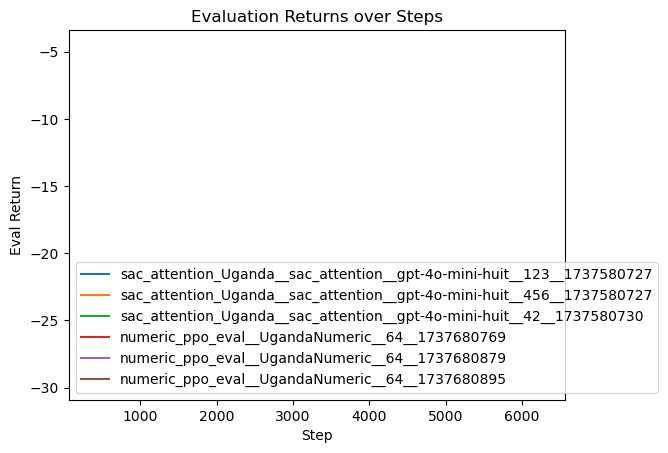

In [94]:
import wandb
import matplotlib.pyplot as plt

# Log in to wandb if not already done
# wandb.login()

# Replace with your wandb project and run details
PROJECT_NAME = "rulebots"
ENTITY_NAME = "rulebots"

# API client
api = wandb.Api()

# Fetch all runs in the project
runs = api.runs(f"{ENTITY_NAME}/{PROJECT_NAME}")

# Process data for a specific metric
metric_key = "charts/eval_return"

for run in runs:
    # Fetch the full history without filtering keys
    history = run.history()

    # Check if '_step' and the metric key exist in the history
    if "_step" in history.columns and metric_key in history.columns:
        steps = history["_step"]  # Extract the _step column
        eval_returns = history[metric_key]  # Extract the evaluation return column

        # Plot data
        plt.plot(steps, eval_returns, label=run.name)
    else:
        print(f"Missing required keys in run: {run.name}")

# Customize plot
plt.xlabel("Step")
plt.ylabel("Eval Return")
plt.title("Evaluation Returns over Steps")
plt.legend()
plt.show()


KeyError: '_step'

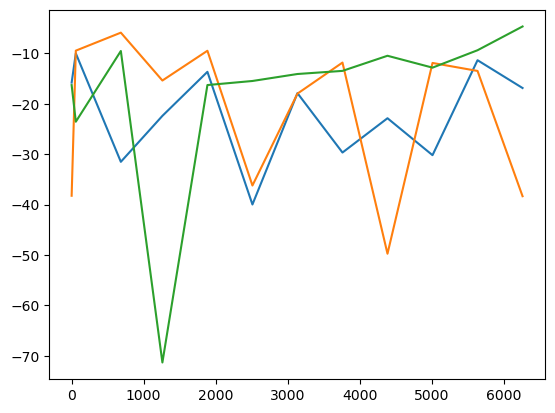

In [93]:
import wandb
import matplotlib.pyplot as plt

# Log in to wandb if not already done
# wandb.login()

# Replace with your wandb project and run details
PROJECT_NAME = "rulebots"
ENTITY_NAME = "rulebots"

# API client
api = wandb.Api()

# Fetch all runs in the project
runs = api.runs(f"{ENTITY_NAME}/{PROJECT_NAME}")

# Process data for a specific metric
metric_key = "charts/eval_return"
for run in runs:
    history = run.history(keys=[metric_key, "_step"])
    steps = history["_step"]  # Extract the step column
    eval_returns = history[metric_key]  # Extract the evaluation return column

    # Plot data
    plt.plot(steps, eval_returns, label=run.name)

# Customize plot
plt.xlabel("Step")
plt.ylabel("Eval Return")
plt.title("Evaluation Returns over Steps")
plt.legend()
plt.show()


In [39]:
import pandas as pd

# Initialize list to store extracted data
eval_return_data = []

# Use wandb.Api() to fetch runs
api = wandb.Api()

entity = "rulebots"
project = "rulebots"
# Fetch all runs
runs = api.runs(f"{entity}/{project}")

# Iterate through runs and extract full history
for run in runs:
    all_history = []
    for row in run.scan_history(keys=["charts/eval_return"]):  # Scan entire history for specific key
        all_history.append(row.get("charts/eval_return", None))  # Get eval_return or None if missing
    
    # Append data for this run
    eval_return_data.append({
        "name": run.name,  # Save the run's name
        "eval_return": [val for val in all_history if val is not None]  # Filter out None values
    })

# Convert the extracted data into a pandas DataFrame
df_eval_return = pd.DataFrame(eval_return_data)

# Debugging: Inspect the DataFrame
print(df_eval_return.head())

                                                name  \
0  sac_attention_Uganda__sac_attention__gpt-4o-mi...   
1  sac_attention_Uganda__sac_attention__gpt-4o-mi...   
2  sac_attention_Uganda__sac_attention__gpt-4o-mi...   
3  eval_llm_Uganda__base_agent__gpt-4o-mini-huit_...   
4  eval_llm_Uganda__llm_rules_agent__gpt-4o-mini-...   

                                         eval_return  
0  [-15.793595, -9.987359, -31.500376, -22.383667...  
1  [-38.23186, -9.445361, -5.8747463, -15.371724,...  
2  [-16.280796, -23.543674, -9.514407, -71.306595...  
3                                                 []  
4                                                 []  


In [78]:
import pandas as pd
import numpy as np

def retrieve_ruleagent_eval_return(df_eval_return, method_name, domain_name, language, seed, alpha=0.3):
    """
    Function to retrieve eval_return for a specific method, domain, language, and seed,
    and compute the exponentially weighted moving average (EWMA) of eval_return.
    
    Parameters:
    - df_eval_return (pd.DataFrame): DataFrame containing the 'name' and 'eval_return' columns.
    - method_name (str): The method name to match.
    - domain_name (str): The domain name to match.
    - language (str): The language to match.
    - seed (str): The seed to match.
    - alpha (float): Smoothing factor for EWMA (default: 0.3).

    Returns:
    - list of dict: Each dictionary contains method_name, domain_name, language, seed,
      eval_return (original list), and ewa_eval_return (smoothed list using EWMA).
    """
    # Initialize list to store matching results
    matching_results = []

    # Iterate through the rows of the DataFrame
    for _, row in df_eval_return.iterrows():
        name = row["name"]  # Extract the name
        eval_return = row["eval_return"]  # Extract eval_return
        
        # Check if the name matches the given format
        pattern = f"{method_name}_{domain_name}__{method_name}__{language}__{seed}__"
        if name.startswith(pattern):
            # Ensure eval_return is a NumPy array and handle NaNs
            eval_return = np.array(eval_return, dtype=float)
            eval_return = eval_return / 64
            if np.isnan(eval_return).any():
                print(f"Warning: NaN values detected in eval_return for {name}. Ignoring NaNs.")
                eval_return = eval_return[~np.isnan(eval_return)]  # Remove NaNs
            
            # Compute the EWMA (list of smoothed values)
            if len(eval_return) > 0:
                ewa_eval_return = []
                current_ewa = eval_return[0]  # Initialize EWMA with the first value
                for value in eval_return:
                    current_ewa = alpha * value + (1 - alpha) * current_ewa
                    ewa_eval_return.append(current_ewa)
            else:
                ewa_eval_return = []

            # Append the extracted data to the result list
            matching_results.append({
                "method_name": method_name,
                "domain_name": domain_name,
                "language": language,
                "seed": seed,
                "eval_return": eval_return.tolist(),  # Convert back to list for storage
                "ewa_eval_return": ewa_eval_return  # List of smoothed values
            })
    
    return matching_results

# # Example usage:
# # Assume df_eval_return is a DataFrame with columns 'name' and 'eval_return'
# method_name = "sac_attention"
# domain_name = "Uganda"
# language = "gpt-4o-mini-huit"
# seed = "42"

# # Call the function
# matching_eval_returns = retrieve_ruleagent_eval_return(df_eval_return, method_name, domain_name, language, seed, alpha=0.3)

# # Check the matching results
# print(matching_eval_returns)

In [79]:
## Add results from the charts 'eval return', This is the performance of our method

cleaned_result = []
seeds = [42, 123, 456]

method_name = "sac_attention"
domain_name = "Uganda"
language = "gpt-4o-mini-huit"

for seed in seeds:
    matching_eval_returns = retrieve_ruleagent_eval_return(df_eval_return, method_name, domain_name, language, seed, alpha=0.3)
    cleaned_result.append(matching_eval_returns)

In [50]:
import pandas as pd

# List to store extracted data
reward_data = []

# Iterate through each result and extract components from the name
for result in results:
    history = result['history']  # This is a pandas DataFrame
    # Check if 'mean_reward' and 'std_reward' are available
    if 'mean_reward' in history.columns and 'std_reward' in history.columns:
        # Split the name into components
        name_parts = result["name"].split("__")
        reward_data.append({
            "script_environment": name_parts[0],  # e.g., "eval_llm_Uganda"
            "baseline_name": name_parts[1],       # e.g., "base_agent"
            "llm_used": name_parts[2],            # e.g., "gpt-4o-mini-huit"
            "script_name": name_parts[3],         # e.g., "eval_llm"
            "seed": name_parts[4],                # e.g., "42"
            "timestamp_id": name_parts[5],        # e.g., "1737583030"
            "mean_reward": history['mean_reward'].dropna().values,
            "std_reward": history['std_reward'].dropna().values
        })

# Convert to DataFrame for easier analysis
df_rewards = pd.DataFrame(reward_data)

## TODO: this needs to be double checked, but I see two results for base agent 
## with seed 42, I feel like it's because we have run it twice or something.
df_rewards = df_rewards[1:]
print(df_rewards)

  script_environment      baseline_name          llm_used script_name seed  \
1    eval_llm_Uganda         base_agent  gpt-4o-mini-huit    eval_llm   42   
2    eval_llm_Uganda         base_agent  gpt-4o-mini-huit    eval_llm  456   
3    eval_llm_Uganda         base_agent  gpt-4o-mini-huit    eval_llm  123   
4    eval_llm_Uganda    llm_rules_agent  gpt-4o-mini-huit    eval_llm  123   
5    eval_llm_Uganda    llm_rules_agent  gpt-4o-mini-huit    eval_llm  456   
6    eval_llm_Uganda    llm_rules_agent  gpt-4o-mini-huit    eval_llm   42   
7    eval_llm_Uganda  no_thoughts_agent  gpt-4o-mini-huit    eval_llm   42   
8    eval_llm_Uganda  no_thoughts_agent  gpt-4o-mini-huit    eval_llm  123   
9    eval_llm_Uganda  no_thoughts_agent  gpt-4o-mini-huit    eval_llm  456   

  timestamp_id    mean_reward    std_reward  
1   1737604403  [-0.49263766]  [0.46819684]  
2   1737604442  [-0.42507067]  [0.37488654]  
3   1737604448  [-0.51558715]  [0.42445374]  
4   1737605000  [-0.42588937]  [0.4

In [80]:
import pandas as pd

def clean_baseline_result(df_rewards, seed=42):
    """
    Filters the input DataFrame to select dictionaries whose 'seed' corresponds to the input seed.
    
    Parameters:
    - df_rewards (pd.DataFrame): DataFrame containing reward data with a 'seed' column.
    - seed (int or str): The seed value to filter by (default: 42).
    
    Returns:
    - pd.DataFrame: A subset of the input DataFrame filtered by the specified seed.
    """
    # Ensure the 'seed' column is treated as string for consistent comparison
    filtered_df = df_rewards[df_rewards['seed'] == str(seed)]
    
    return filtered_df

target_seed = 42
filtered_ruleagent_rewards = []
for i in range(len(cleaned_result)):
    if cleaned_result[i][0]['seed'] == target_seed:
        filtered_ruleagent_rewards.append(cleaned_result[i][0])

filtered_baseline_rewards = clean_baseline_result(df_rewards, target_seed)

In [104]:
target_seed = 42
filtered_ruleagent_rewards = []
for i in range(len(cleaned_result)):
    if cleaned_result[i][0]['seed'] == target_seed:
        filtered_ruleagent_rewards.append(cleaned_result[i][0])

filtered_baseline_rewards = clean_baseline_result(df_rewards, target_seed)
filtered_baseline_rewards

,script_environment,baseline_name,llm_used,script_name,seed,timestamp_id,mean_reward,std_reward
1,eval_llm_Uganda,base_agent,gpt-4o-mini-huit,eval_llm,42,1737604403,[-0.49263766],[0.46819684]
6,eval_llm_Uganda,llm_rules_agent,gpt-4o-mini-huit,eval_llm,42,1737605005,[-0.75035495],[0.5310704]
7,eval_llm_Uganda,no_thoughts_agent,gpt-4o-mini-huit,eval_llm,42,1737605230,[-0.46280935],[0.48061204]


In [105]:
target_seed = 123
filtered_ruleagent_rewards = []
for i in range(len(cleaned_result)):
    if cleaned_result[i][0]['seed'] == target_seed:
        filtered_ruleagent_rewards.append(cleaned_result[i][0])

filtered_baseline_rewards = clean_baseline_result(df_rewards, target_seed)
filtered_baseline_rewards

,script_environment,baseline_name,llm_used,script_name,seed,timestamp_id,mean_reward,std_reward
3,eval_llm_Uganda,base_agent,gpt-4o-mini-huit,eval_llm,123,1737604448,[-0.51558715],[0.42445374]
4,eval_llm_Uganda,llm_rules_agent,gpt-4o-mini-huit,eval_llm,123,1737605000,[-0.42588937],[0.48996216]
8,eval_llm_Uganda,no_thoughts_agent,gpt-4o-mini-huit,eval_llm,123,1737605230,[-0.58666706],[0.43958512]


In [106]:
target_seed = 456
filtered_ruleagent_rewards = []
for i in range(len(cleaned_result)):
    if cleaned_result[i][0]['seed'] == target_seed:
        filtered_ruleagent_rewards.append(cleaned_result[i][0])

filtered_baseline_rewards = clean_baseline_result(df_rewards, target_seed)
filtered_baseline_rewards

,script_environment,baseline_name,llm_used,script_name,seed,timestamp_id,mean_reward,std_reward
2,eval_llm_Uganda,base_agent,gpt-4o-mini-huit,eval_llm,456,1737604442,[-0.42507067],[0.37488654]
5,eval_llm_Uganda,llm_rules_agent,gpt-4o-mini-huit,eval_llm,456,1737605001,[-0.7185985],[0.45566973]
9,eval_llm_Uganda,no_thoughts_agent,gpt-4o-mini-huit,eval_llm,456,1737605230,[-0.7807449],[0.5636052]


In [107]:
(-0.42507067 + -0.51558715 + -0.49263766)/3

-0.47776515999999997

In [108]:
(-0.75035495 + -0.42588937 + -0.7185985)/3

-0.6316142733333333

In [109]:
(-0.46280935 + -0.58666706 + -0.7807449)/3

-0.61007377

In [81]:
filtered_ruleagent_rewards

[{'method_name': 'sac_attention',
  'domain_name': 'Uganda',
  'language': 'gpt-4o-mini-huit',
  'seed': 42,
  'eval_return': [-0.2543874375,
   -0.36786990625,
   -0.148662609375,
   -1.114165546875,
   -0.25422278125,
   -0.241618375,
   -0.2199682890625,
   -0.2103294375,
   -0.163439171875,
   -0.2002573125,
   -0.146317296875,
   -0.072661928125],
  'ewa_eval_return': [-0.2543874375,
   -0.288432178125,
   -0.2465013075,
   -0.5068005793125,
   -0.43102723989374997,
   -0.374204580425625,
   -0.3279336930166875,
   -0.29265241636168127,
   -0.25388844301567687,
   -0.2377991038609738,
   -0.21035456176518166,
   -0.16904677167312715]}]

In [61]:
filtered_baseline_rewards 

[{'method_name': 'sac_attention',
  'domain_name': 'Uganda',
  'language': 'gpt-4o-mini-huit',
  'seed': 42,
  'eval_return': [-16.280796,
   -23.543674,
   -9.514407,
   -71.306595,
   -16.270258,
   -15.463576,
   -14.0779705,
   -13.461084,
   -10.460107,
   -12.816468,
   -9.364307,
   -4.6503634],
  'ewa_eval_return': [-16.280796,
   -18.4596594,
   -15.77608368,
   -32.435237076,
   -27.585743353199998,
   -23.94909314724,
   -20.987756353068,
   -18.7297546471476,
   -16.24886035300332,
   -15.219142647102323,
   -13.462691952971626,
   -10.818993387080138]}]

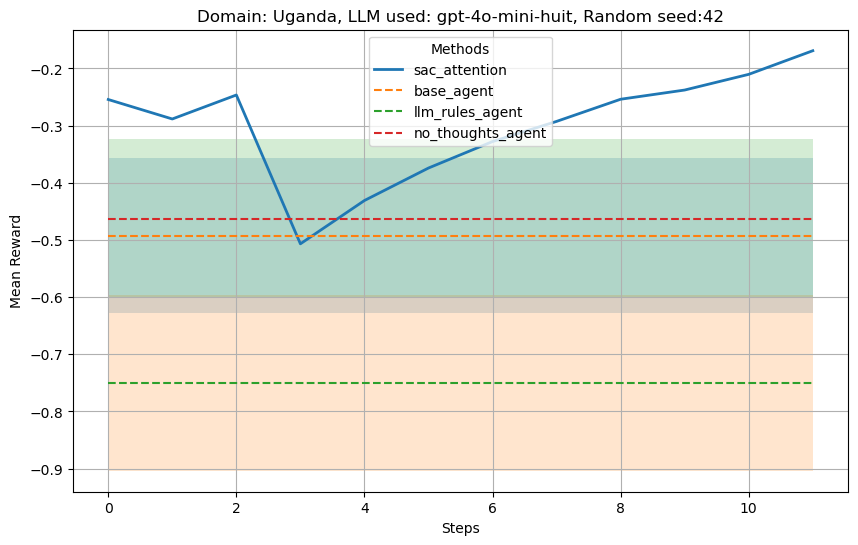

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for the plot title
ruleagent = filtered_ruleagent_rewards[0]  # Assuming only one matching entry for the rule agent
domain_name = ruleagent["domain_name"]
language = ruleagent["language"]
seed = ruleagent["seed"]
ewa_eval_return = ruleagent["ewa_eval_return"]
method_name = ruleagent["method_name"]

# Plot title
plot_title = f"Domain: {domain_name}, LLM used: {language}, Random seed:{seed}"

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot ewa_eval_return from rule agent
plt.plot(ewa_eval_return, label=method_name, linestyle="-", linewidth=2)

# Plot mean rewards with std deviation from each baseline agent
for _, row in filtered_baseline_rewards.iterrows():
    mean_reward = row["mean_reward"][0]  # Extract the single mean reward value
    std_reward = row["std_reward"][0]  # Extract the single std reward value
    length = len(ewa_eval_return)  # Length of ewa_eval_return
    
    # Compute scaled std deviation
    scaled_std_reward = std_reward / np.sqrt(length)
    
    # Replicate the mean reward to match the length of ewa_eval_return
    replicated_mean_reward = [mean_reward] * length
    
    # Add mean reward line
    plt.plot(replicated_mean_reward, label=row["baseline_name"], linestyle="--", linewidth=1.5)
    
    # Add shaded area for std deviation
    lower_bound = np.array(replicated_mean_reward) - scaled_std_reward
    upper_bound = np.array(replicated_mean_reward) + scaled_std_reward
    plt.fill_between(range(length), lower_bound, upper_bound, alpha=0.2)

# Add plot details
plt.title(plot_title)
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.legend(title="Methods")
plt.grid(True)

# Show the plot
plt.show()


## P3